## Import Packages

In [ ]:
!pip install pycaret[full]
import pycaret
!pip install pyyaml==5.4.1
from pycaret.utils import enable_colab
enable_colab()
from pycaret.regression import *

     |████████████████████████████████| 288 kB 5.1 MB/s 
     |████████████████████████████████| 15.5 MB 48.4 MB/s 
     |████████████████████████████████| 1.3 MB 54.9 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 261 kB 57.4 MB/s 
     |████████████████████████████████| 6.8 MB 51.2 MB/s 
     |████████████████████████████████| 167 kB 63.7 MB/s 
     |████████████████████████████████| 113 kB 44.9 MB/s 
     |████████████████████████████████| 2.0 MB 27.5 MB/s 
     |████████████████████████████████| 1.7 MB 19.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 356 kB 60.8 MB/s 
     |████████████████████████████████| 131 kB 66.9 MB/s 
     |████████████████████████████████| 173.5 MB 10 kB/s 
     |█████████████████

     |████████████████████████████████| 636 kB 4.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Colab mode enabled.


/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: sklearn.neighbors._dist_metrics.DistanceMetric size changed, may indicate binary incompatibility. Expected 88 from C header, got 472 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3749    0  3749    0     0  14759      0 --:--:-- --:--:-- --:--:-- 14701
100  503k  100  503k    0     0   864k      0 --:--:-- --:--:-- --:--:--  864k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3769    0  3769    0     0  20047      0 --:--:-- --:--:-- --:--:-- 20047
100  406k  100  406k    0     0   719k      0 --:--:-- --:--:-- --:--:-- 3597k


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/My Drive/APS1052_project/SPY_data.csv'
#data_dir = '/content/drive/My Drive/APS_1052_project/AMD.xlsx'

data_dir2 = '/content/drive/My Drive/APS1052_project/'
data_dir3 = '/content/drive/My Drive/APS1052_project/VIX.xlsx'
data_dir4 = '/content/drive/My Drive/APS1052_project/DIX.csv'
data_dir5 = '/content/drive/My Drive/APS1052_project/pcratio.xlsx'
data_dir6 = '/content/drive/My Drive/APS1052_project/fff.csv'


In [ ]:
import os
os.chdir(data_dir2)
!ls

 AMD.xlsx				      PC_Ratio_APS_Project.ipynb
 APS1052_FinalProject.ipynb		      pcratio.xlsx
'APS 1052 Final Project (slides 6-10).pptx'   Presentation.pptx
 APS_Project.ipynb			      __pycache__
 catboost_info				     'Results\Importances.png'
'Copy of Copy of APS_Project.ipynb'	     'Results\Residuals.png'
 detrendPrice.py			      sntwiabl8vwxvs4i.csv
 DIX.csv				      SPY_data.csv
 fAux.py				      VIX_APS_Project.ipynb
 fff.csv				      VIX.xlsx
 inflation.csv				      WhiteRealityCheckFor1.py
 logs.log


In [ ]:
import pandas as pd
import os
import fAux
import WhiteRealityCheckFor1
import detrendPrice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import talib as ta

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import and Process Data

In [ ]:
dix = pd.read_csv(data_dir4)
dix.head()

,date,price,dix,gex
0,2011-05-02,1361.219971,0.378842,1.897313e+09
1,2011-05-03,1356.619995,0.383411,1.859731e+09
2,2011-05-04,1347.319946,0.392122,1.717764e+09
3,2011-05-05,1335.099976,0.405457,1.361864e+09
4,2011-05-06,1340.199951,0.418649,1.490329e+09


In [ ]:
vix = pd.read_excel(data_dir3)
vix.head()

,Date,CBOE S&P500 Volatility Index - Open
0,2009-01-02,39.58
1,2009-01-05,39.24
2,2009-01-06,38.06
3,2009-01-07,40.29
4,2009-01-08,43.38


In [ ]:
df = pd.read_csv(data_dir)
df.head()

,PERMNO,date,TICKER,HSICMG,BIDLO,ASKHI,PRC,VOL,OPENPRC,sprtrn
0,84398,01/03/2000,SPY,NaN,143.87500,148.25000,145.4375,8164299,148.25000,-0.009549
1,84398,01/04/2000,SPY,NaN,139.64063,144.06250,139.7500,8089799,143.53125,-0.038345
2,84398,01/05/2000,SPY,NaN,137.25000,141.53125,140.0000,12177899,139.93750,0.001922
3,84398,01/06/2000,SPY,NaN,137.75000,141.50000,137.7500,6227199,139.62500,0.000956
4,84398,01/07/2000,SPY,NaN,140.06250,145.75000,145.7500,8066599,140.31250,0.027090


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
#df.drop(['date'], axis=1, inplace=True)
df

,PERMNO,TICKER,HSICMG,BIDLO,ASKHI,PRC,VOL,OPENPRC,sprtrn
date,,,,,,,,,
2000-01-03,84398,SPY,NaN,143.87500,148.25000,145.43750,8164299,148.25000,-0.009549
2000-01-04,84398,SPY,NaN,139.64063,144.06250,139.75000,8089799,143.53125,-0.038345
2000-01-05,84398,SPY,NaN,137.25000,141.53125,140.00000,12177899,139.93750,0.001922
2000-01-06,84398,SPY,NaN,137.75000,141.50000,137.75000,6227199,139.62500,0.000956
2000-01-07,84398,SPY,NaN,140.06250,145.75000,145.75000,8066599,140.31250,0.027090
...,...,...,...,...,...,...,...,...,...
2020-12-24,84398,SPY,67.0,367.45001,369.03000,369.00000,26457853,368.07999,0.003537
2020-12-28,84398,SPY,67.0,371.07001,372.59000,372.17001,39000402,371.73999,0.008723
2020-12-29,84398,SPY,67.0,370.82999,374.00000,371.45999,53680451,373.81000,-0.002227


In [ ]:
df.head()

,PERMNO,TICKER,HSICMG,BIDLO,ASKHI,PRC,VOL,OPENPRC,sprtrn
date,,,,,,,,,
2000-01-03,84398,SPY,NaN,143.87500,148.25000,145.4375,8164299,148.25000,-0.009549
2000-01-04,84398,SPY,NaN,139.64063,144.06250,139.7500,8089799,143.53125,-0.038345
2000-01-05,84398,SPY,NaN,137.25000,141.53125,140.0000,12177899,139.93750,0.001922
2000-01-06,84398,SPY,NaN,137.75000,141.50000,137.7500,6227199,139.62500,0.000956
2000-01-07,84398,SPY,NaN,140.06250,145.75000,145.7500,8066599,140.31250,0.027090


In [ ]:
pcratio = pd.read_excel(data_dir5)
pcratio.columns = ['ID', 'date', 'flag', 'inflag', 'vol']
calls = pcratio[pcratio['flag']=='C']
puts = pcratio[pcratio['flag']=='P']
calls.drop(['ID', 'flag', 'inflag'], axis=1)
puts.drop(['ID', 'flag', 'inflag'], axis=1)
calls['ratio'] = puts['vol'].values/calls['vol'].values
ratio = calls.copy()
ratio.drop(['ID', 'flag', 'inflag', 'vol'], axis=1, inplace=True)
ratio['date'] = pd.to_datetime(ratio['date'])
ratio = ratio.set_index('date')
ratio


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ratio
date,
2005-01-10,0.834598
2005-01-11,1.134168
2005-01-12,1.413229
2005-01-13,1.800911
2005-01-14,0.632647
...,...
2020-12-24,1.388211
2020-12-28,1.380474
2020-12-29,1.877185


In [ ]:
fff = pd.read_csv('fff.csv')
fff['date'] = pd.to_datetime(fff['date'], format='%Y%m%d')
fff = fff.set_index('date')
fff = fff.drop('RF', axis = 1)
df['Mkt-RF'] = fff['Mkt-RF']
df['SMB'] = fff['SMB']
df['HML'] = fff['HML']
df['RMW'] = fff['RMW']
df['CMA'] = fff['CMA']
fff

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
2006-01-03,1.50,-0.14,0.18,0.18,-0.32
2006-01-04,0.46,0.31,0.03,-0.44,0.33
2006-01-05,0.03,0.23,-0.10,-0.55,0.19
2006-01-06,0.92,0.09,-0.24,-0.03,0.14
2006-01-09,0.45,0.51,-0.16,0.06,-0.04
...,...,...,...,...,...
2020-12-24,0.21,-0.43,-0.18,0.23,-0.06
2020-12-28,0.46,-0.67,0.34,1.39,0.46
2020-12-29,-0.40,-1.42,0.23,0.75,-0.30


In [ ]:
# PRC is the closing price
# OPENPRC is the open price

orig_cols = df.columns.values.tolist()
openp = df['OPENPRC'].copy()
openp

date
2000-01-03    148.25000
2000-01-04    143.53125
2000-01-05    139.93750
2000-01-06    139.62500
2000-01-07    140.31250
                ...    
2020-12-24    368.07999
2020-12-28    371.73999
2020-12-29    373.81000
2020-12-30    372.34000
2020-12-31    371.78000
Name: OPENPRC, Length: 5284, dtype: float64

In [ ]:
high = df['ASKHI'].shift(1)
low = df['BIDLO'].shift(1)
close = df['PRC'].shift(1)

# Calulate Input Features

In [ ]:
n=14
df['RSI']=ta.RSI(np.array(close), timeperiod=n)
df['SMA'] = close.rolling(window=n).mean()
df['Corr']= close.rolling(window=n).corr(df['SMA'])
df['SAR']=ta.SAR(np.array(high),np.array(low), 0.2,0.2)
df['ADX']=ta.ADX(np.array(high),np.array(low), np.array(df['OPENPRC']), timeperiod =n)
df['OO']= df['OPENPRC']-df['OPENPRC'].shift(1)
df['OC']= df['OPENPRC']-close
df['putcallratio'] = ratio['ratio']
df.fillna(0, inplace=True)

In [ ]:
##build day time features
##df["hour"] = df.index.hour.values
df["day"] = df.index.dayofweek.values
#df_dummies_hour = pd.get_dummies(df["hour"], prefix='hour')
df_dummies_day = pd.get_dummies(df["day"], prefix='day')
#df =df.join(df_dummies_hour)
df=df.join(df_dummies_day)
df.drop(["day"], axis=1, inplace=True)

In [ ]:
df
RSI = df['RSI']
putcallratio = ratio['ratio']

In [ ]:
df1 = df.tail(3200)

# Visualize data

In [ ]:
#sns.lineplot(data=x_train.iloc[0:1000], x="date", y="RSI")

In [ ]:
#sns.lineplot(data=smooth_dds.iloc[0:1000], x="date", y="RSI")

In [ ]:
#sns.lineplot(data=df.iloc[0:1000], x="date", y="OC")

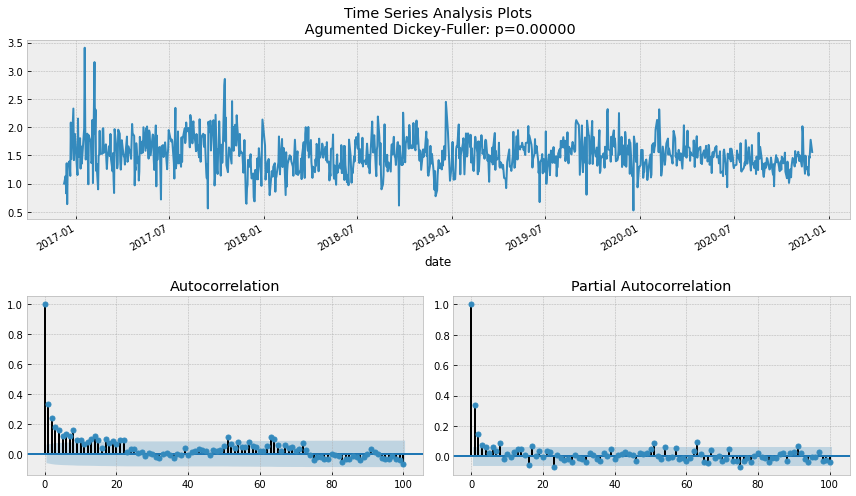

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries pandas series
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Agumented Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
tsplot(putcallratio[3000:4000], lags=100)

## Build Target

In [ ]:
#build target
df['retFut1'] = df['OPENPRC'].pct_change(1).shift(-1).fillna(0) #if you enter the trade at the open
#df['retFut1'] = df['PRC'].pct_change(1).shift(-1).fillna(0) #if you wait until the close to enter the trade
df['pcratio1'] = ratio['ratio'].shift(-1).fillna(0)
#df['RSI1'] = df['RSI'].shift(-1).fillna(0) 
#df.dropna(inplace=True) #make sure no Nans in df
#df = np.log(df+1)

#Preserve for calculations of system return
retFut1 = df['retFut1'].copy()
#RSI1 = df['RSI1'].copy()

In [ ]:
df

,PERMNO,TICKER,HSICMG,BIDLO,ASKHI,PRC,VOL,OPENPRC,sprtrn,Mkt-RF,SMB,HML,RMW,CMA,RSI,SMA,Corr,SAR,ADX,OO,OC,putcallratio,day_0,day_1,day_2,day_3,day_4,retFut1,pcratio1
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,84398,SPY,0.0,143.87500,148.25000,145.43750,8164299,148.25000,-0.009549,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1,0,0,0,0,-0.031830,NaN
2000-01-04,84398,SPY,0.0,139.64063,144.06250,139.75000,8089799,143.53125,-0.038345,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,-4.71875,-1.90625,0.000000,0,1,0,0,0,-0.025038,NaN
2000-01-05,84398,SPY,0.0,137.25000,141.53125,140.00000,12177899,139.93750,0.001922,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,148.250000,0.000000,-3.59375,0.18750,0.000000,0,0,1,0,0,-0.002233,NaN
2000-01-06,84398,SPY,0.0,137.75000,141.50000,137.75000,6227199,139.62500,0.000956,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,146.528126,0.000000,-0.31250,-0.37500,0.000000,0,0,0,1,0,0.004924,NaN
2000-01-07,84398,SPY,0.0,140.06250,145.75000,145.75000,8066599,140.31250,0.027090,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,144.672501,0.000000,0.68750,2.56250,0.000000,0,0,0,0,1,0.042316,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,84398,SPY,67.0,367.45001,369.03000,369.00000,26457853,368.07999,0.003537,0.21,-0.43,-0.18,0.23,-0.06,57.157480,368.392858,-0.037166,362.030000,23.264808,-0.20001,0.50998,1.388211,0,0,0,1,0,0.009943,1.380474
2020-12-28,84398,SPY,67.0,371.07001,372.59000,372.17001,39000402,371.73999,0.008723,0.46,-0.67,0.34,1.39,0.46,59.393363,368.332143,0.101023,365.315998,23.965289,3.66000,2.73999,1.380474,1,0,0,0,0,0.005568,1.877185
2020-12-29,84398,SPY,67.0,370.82999,374.00000,371.45999,53680451,373.81000,-0.002227,-0.40,-1.42,0.23,0.75,-0.30,63.892082,368.552144,0.296081,367.217190,25.166677,2.07001,1.63999,1.877185,0,1,0,0,0,-0.003932,1.388179


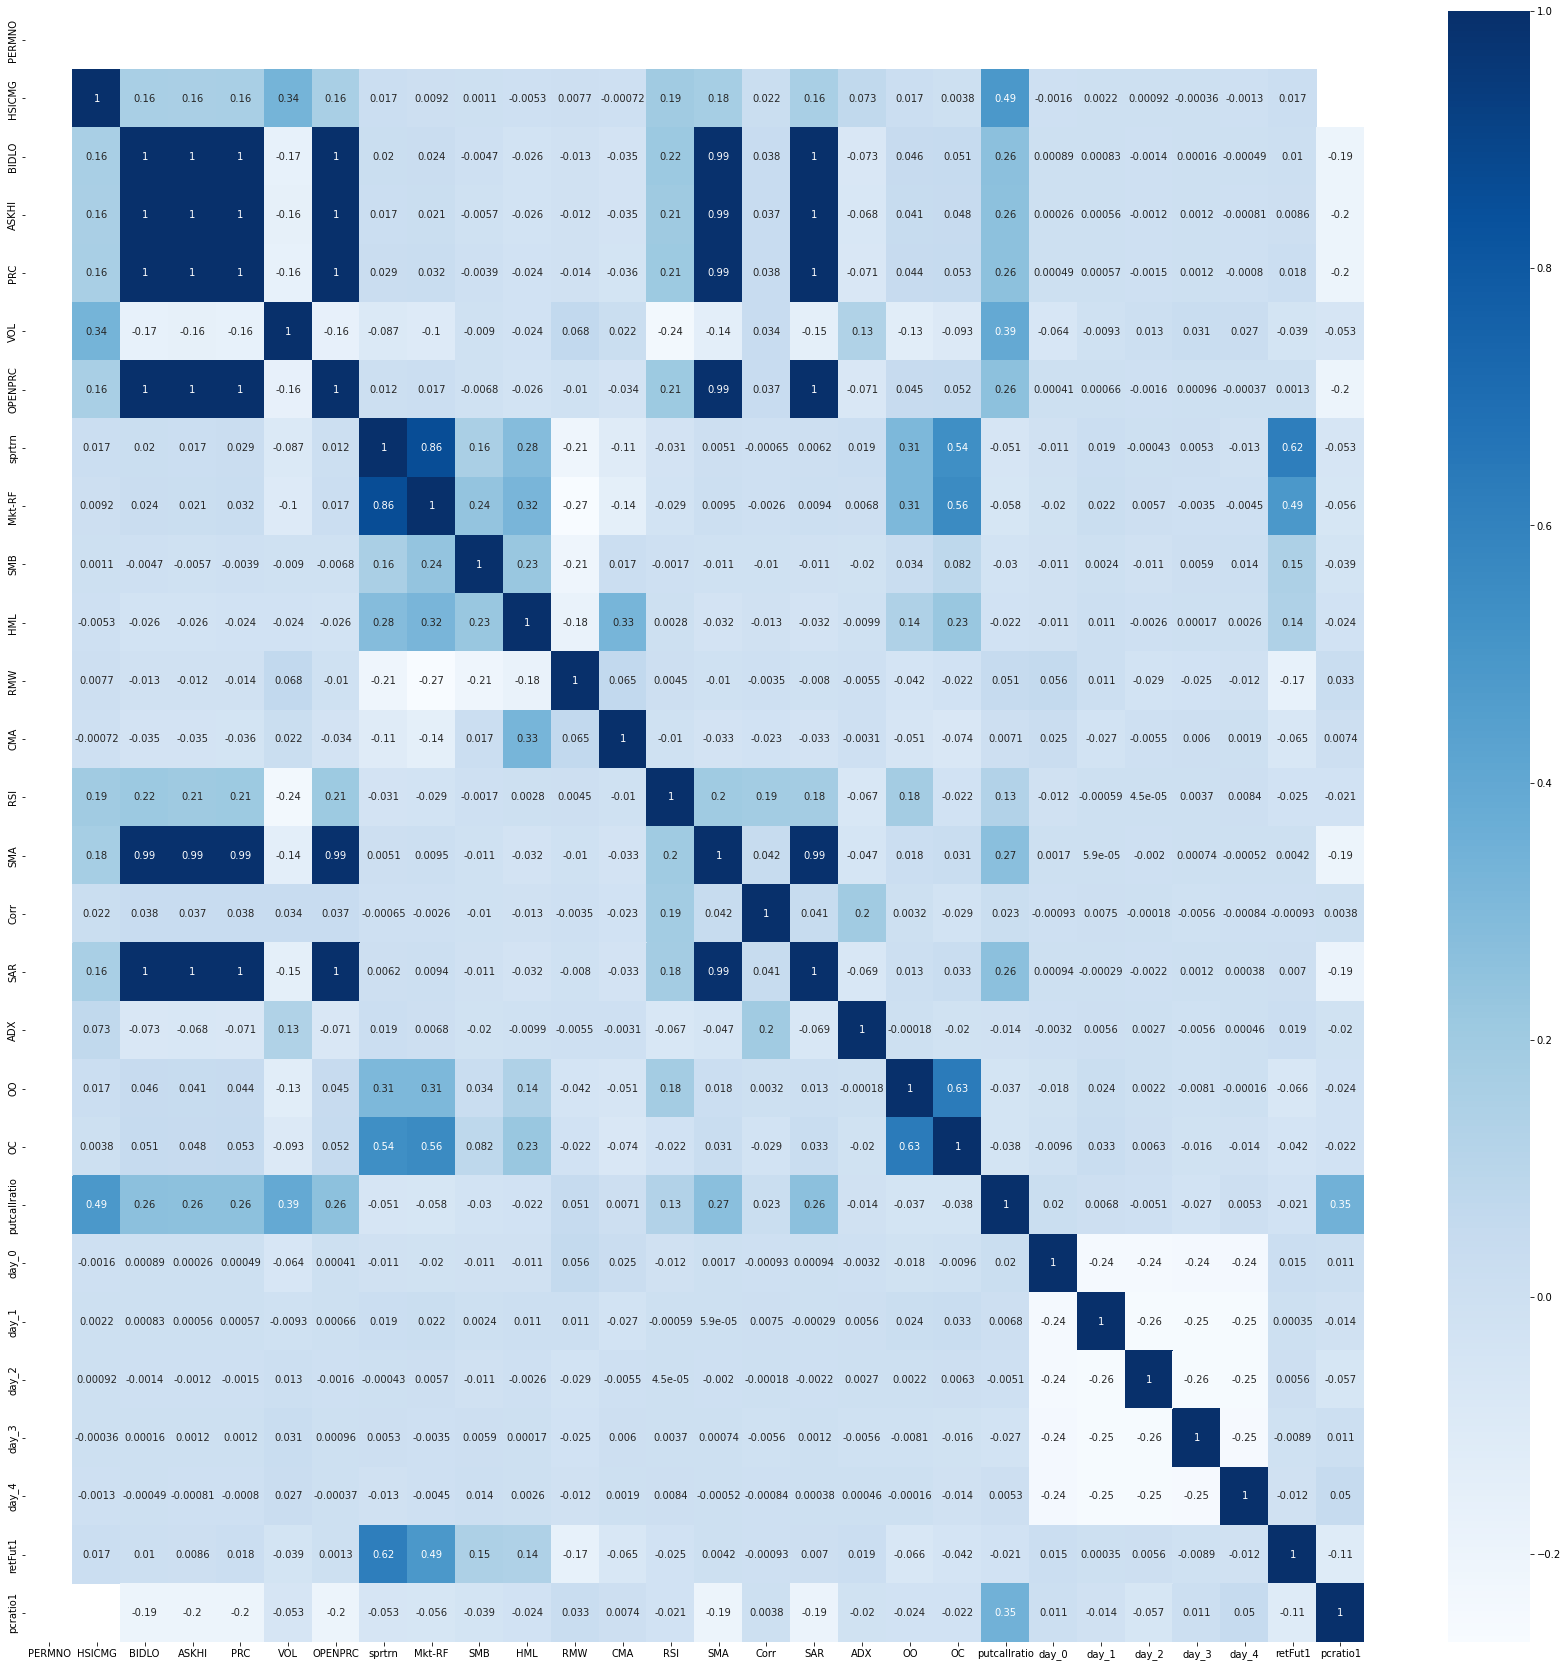

In [ ]:
corr = df.corr()
plt.figure(figsize=[30,30])
sns.heatmap(corr, cmap="Blues", annot=True )


## Create Lags 


## Split Train and Test Data

In [ ]:
#build lags
for n in list(range(0,15)):
    name = 'putcallratio' + str(n)
    df[name] =  ratio['ratio'].shift(n).fillna(0)

#select the features (by dropping)
#orig_cols = ['<HIGH>', '<LOW>', '<CLOSE>', '<SPREAD>',  '<VOL>']#keep the open
orig_cols = ['TICKER','HSICMG','sprtrn','PRC','VOL','PERMNO','BIDLO','ASKHI','OPENPRC','putcallratio', 'retFut1']#keep the open

df.drop(orig_cols, axis=1, inplace=True)

#distribute the df data into X inputs and y target
#X = df.drop(['retFut1'], axis=1)
#y = df[['retFut1']]

X = df.drop(['pcratio1'], axis=1)
y = df[['pcratio1']]

start = 2500
end = 5284
#select the samples
x_train = X.iloc[start:start+int((end-start)*2/3)]
x_test = X.iloc[start+int((end-start)*2/3):]

y_train = y.iloc[start:start+int((end-start)*2/3)]
y_test = y.iloc[start+int((end-start)*2/3):]

retFut1_train = retFut1[start:start+int((end-start)*2/3)]
retFut1_test = retFut1[start+int((end-start)*2/3):]

ratio_train = x_train['putcallratio0']
ratio_test = x_test['putcallratio0']

In [ ]:
x_train

,Mkt-RF,SMB,HML,RMW,CMA,RSI,SMA,Corr,SAR,ADX,OO,OC,day_0,day_1,day_2,day_3,day_4,putcallratio0,putcallratio1,putcallratio2,putcallratio3,putcallratio4,putcallratio5,putcallratio6,putcallratio7,putcallratio8,putcallratio9,putcallratio10,putcallratio11,putcallratio12,putcallratio13,putcallratio14
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-10,0.50,-0.93,-0.10,0.51,-0.26,52.032735,110.454357,0.330304,111.758000,13.993848,1.12000,0.67900,0,0,0,1,0,1.556448,1.646560,1.210624,1.476973,1.345370,1.620531,2.480102,1.423572,1.899283,1.982689,1.499759,1.664408,1.686427,1.344931,1.379330
2009-12-11,0.43,0.43,0.49,0.22,0.25,54.742965,110.512929,0.226880,111.210400,13.066908,0.41000,0.47000,0,0,0,0,1,1.602364,1.556448,1.646560,1.210624,1.476973,1.345370,1.620531,2.480102,1.423572,1.899283,1.982689,1.499759,1.664408,1.686427,1.344931
2009-12-14,0.80,0.73,0.32,-0.21,-0.66,56.741556,110.632929,-0.103169,109.020000,12.236222,0.76000,0.76000,1,0,0,0,0,1.801706,1.602364,1.556448,1.646560,1.210624,1.476973,1.345370,1.620531,2.480102,1.423572,1.899283,1.982689,1.499759,1.664408,1.686427
2009-12-15,-0.48,0.17,-0.61,0.42,-0.32,59.830663,110.707929,0.091610,112.000000,13.859429,-0.41000,-0.41000,0,1,0,0,0,1.285725,1.801706,1.602364,1.556448,1.646560,1.210624,1.476973,1.345370,1.620531,2.480102,1.423572,1.899283,1.982689,1.499759,1.664408
2009-12-16,0.19,0.51,0.71,-0.43,0.06,56.839849,110.733643,0.324244,112.000000,15.366692,0.34000,0.45000,0,0,1,0,0,0.927508,1.285725,1.801706,1.602364,1.556448,1.646560,1.210624,1.476973,1.345370,1.620531,2.480102,1.423572,1.899283,1.982689,1.499759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-20,0.83,0.60,0.26,0.23,-0.20,43.283965,234.791429,0.663677,232.509990,15.840081,-0.37001,0.70999,0,0,0,1,0,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158,1.385611,1.833828,1.505094,1.337268,1.469032,1.478633,1.525348,1.769471,1.402758
2017-04-21,-0.28,0.06,-0.15,0.34,-0.19,52.335975,234.723572,0.444123,232.997992,14.857748,1.10001,-0.09000,0,0,0,0,1,1.890246,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158,1.385611,1.833828,1.505094,1.337268,1.469032,1.478633,1.525348,1.769471
2017-04-24,1.18,0.28,0.50,-0.06,0.16,49.010737,234.641429,0.309013,233.179990,13.945581,1.92999,2.58999,1,0,0,0,0,1.845910,1.890246,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158,1.385611,1.833828,1.505094,1.337268,1.469032,1.478633,1.525348


In [ ]:
y_train

,pcratio1
date,
2009-12-10,1.602364
2009-12-11,1.801706
2009-12-14,1.285725
2009-12-15,0.927508
2009-12-16,0.362891
...,...
2017-04-20,1.890246
2017-04-21,1.845910
2017-04-24,0.968572


In [ ]:
x_test

,Mkt-RF,SMB,HML,RMW,CMA,RSI,SMA,Corr,SAR,ADX,OO,OC,day_0,day_1,day_2,day_3,day_4,putcallratio0,putcallratio1,putcallratio2,putcallratio3,putcallratio4,putcallratio5,putcallratio6,putcallratio7,putcallratio8,putcallratio9,putcallratio10,putcallratio11,putcallratio12,putcallratio13,putcallratio14
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-27,0.05,-0.20,-0.98,0.18,-0.57,62.088856,235.250714,0.252597,234.562810,16.804663,0.26001,0.37001,0,0,0,1,0,1.239993,1.295179,0.968572,1.845910,1.890246,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158,1.385611,1.833828,1.505094,1.337268
2017-04-28,-0.30,-0.76,-0.60,0.08,-0.19,62.701822,235.476429,0.470654,235.556248,17.705383,0.12999,0.29998,0,0,0,0,1,1.715753,1.239993,1.295179,0.968572,1.845910,1.890246,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158,1.385611,1.833828,1.505094
2017-05-01,0.21,0.25,-0.12,-0.18,-0.50,59.986353,235.682143,0.551864,236.350998,18.493900,-0.22000,0.59999,1,0,0,0,0,1.361631,1.715753,1.239993,1.295179,0.968572,1.845910,1.890246,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158,1.385611,1.833828
2017-05-02,0.03,-0.46,-0.22,0.42,-0.35,62.029627,235.920714,0.624636,236.986799,19.358755,0.16001,0.16001,0,1,0,0,0,1.475421,1.361631,1.715753,1.239993,1.295179,0.968572,1.845910,1.890246,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158,1.385611
2017-05-03,-0.19,-0.51,0.21,-0.02,0.13,62.340316,236.185714,0.664180,237.495439,20.161835,-0.55001,-0.48001,0,0,1,0,0,1.054100,1.475421,1.361631,1.715753,1.239993,1.295179,0.968572,1.845910,1.890246,2.057492,1.720179,1.439674,1.520621,1.660220,1.408158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.21,-0.43,-0.18,0.23,-0.06,57.157480,368.392858,-0.037166,362.030000,23.264808,-0.20001,0.50998,0,0,0,1,0,1.388211,1.439511,1.657790,1.332431,1.290459,0.602732,1.354761,1.569899,1.160836,1.400932,1.353851,1.337574,1.479274,1.198804,1.402776
2020-12-28,0.46,-0.67,0.34,1.39,0.46,59.393363,368.332143,0.101023,365.315998,23.965289,3.66000,2.73999,1,0,0,0,0,1.380474,1.388211,1.439511,1.657790,1.332431,1.290459,0.602732,1.354761,1.569899,1.160836,1.400932,1.353851,1.337574,1.479274,1.198804
2020-12-29,-0.40,-1.42,0.23,0.75,-0.30,63.892082,368.552144,0.296081,367.217190,25.166677,2.07001,1.63999,0,1,0,0,0,1.877185,1.380474,1.388211,1.439511,1.657790,1.332431,1.290459,0.602732,1.354761,1.569899,1.160836,1.400932,1.353851,1.337574,1.479274


In [ ]:
y_test

,pcratio1
date,
2017-04-27,1.715753
2017-04-28,1.361631
2017-05-01,1.475421
2017-05-02,1.054100
2017-05-03,1.214495
...,...
2020-12-24,1.380474
2020-12-28,1.877185
2020-12-29,1.388179


## Import ML Models

In [ ]:
#set up the grid search and fit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer 
import detrendPrice 
import WhiteRealityCheckFor1 
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVR

## Define Helper Functions

In [ ]:
def information_coefficient(y_true, y_pred):
    rho, pval = spearmanr(y_true,y_pred) #spearman's rank correlation
    print (rho)
    return rho

"""
# Not Used
def sharpe(y_true, y_pred):
    positions = np.where(y_pred> 0,1,-1 )
    dailyRet = pd.Series(positions).shift(1).fillna(0).values * y_true
    dailyRet = np.nan_to_num(dailyRet)
    ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
    return ratio
"""

'\n# Not Used\ndef sharpe(y_true, y_pred):\n    positions = np.where(y_pred> 0,1,-1 )\n    dailyRet = pd.Series(positions).shift(1).fillna(0).values * y_true\n    dailyRet = np.nan_to_num(dailyRet)\n    ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)\n    return ratio\n'

In [ ]:
def wavelet_smoother(x_train, scale=None):
    wavelet = "db6"
    df_wavelets = x_train.copy()
    for i in x_train.columns:
        signal = x_train[i]
        coefficients = pywt.wavedec(signal, wavelet, mode='per')
        coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
        reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
        df_wavelets[i] = reconstructed_signal
    df_wavelets = df_wavelets.fillna(0)
    return df_wavelets

## Create Scorer



In [ ]:
myscorer = None #is mse
myscorer = make_scorer(information_coefficient, greater_is_better=True)
#myscorer = make_scorer(sharpe, greater_is_better=True)

#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso (coefficients can become zero)

In [ ]:

scaler = StandardScaler()
wavelet_smoother = FunctionTransformer(wavelet_smoother)
pca = PCA()

# Select Features to Smooth

In [ ]:

dfs = x_train[x_train.columns.difference(['<TICKVOL>','<OPEN>'])]
numerical_ix = dfs.select_dtypes(include=['float64']).columns
all = dfs.columns


In [ ]:
t = [('scaler', scaler, all), ('wav', wavelet_smoother, numerical_ix), ('pca', pca, numerical_ix)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')


# Create Model and Pipeline

In [ ]:
#  Random Forest model
#rforest = RandomForestRegressor()

# Bayesian Ridge
bridge = BayesianRidge()


pipe = Pipeline([('prep', col_transform), ('bridge', bridge)])

alpha_init = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9]
lambda_init = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]
#a = GridSearchCV(estimator=BayesianRidge(), param_grid = bay_params, cv = 3, n_jobs=-1)
#nestimators_rs = [200, 300, 500]
ncomponents_rs =   list(range(10,21))
scales_rs = [{'scale': .5},{'scale': .1}]


## Setup Parameter Grid and Train Model

In [ ]:
#set of parameters for random search
param_grid =  [{'bridge__alpha_init': alpha_init,
                'bridge__lambda_init': lambda_init,
                'prep__pca__n_components':ncomponents_rs,
                'prep__wav__kw_args': scales_rs,}]

'''
#set of parameters for random search
param_grid = [{'svr__epsilon':  epsilon_rs,'svr__C': c_rs, 'prep__pca__n_components':ncomponents_rs, 'prep__wav__kw_args': scales_rs}]
'''


#grid_search = RandomizedSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)
grid_search = RandomizedSearchCV(pipe, param_grid, cv=4, scoring=myscorer, return_train_score=True, error_score='raise')
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

#grid_search.fit(x_train.values, y_train.values.ravel())
grid_search.fit(x_train, y_train.values.ravel())


best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


0.29785651857765294
0.49337078685277946
0.4247595720707193
0.4715716891674934
0.4507104125774498
0.45603617522584144
0.3136215665594361
0.46263206526615336
0.2953786633389952
0.5102753535644707
0.4470149217873471
0.4800847104708147
0.4583225422055223
0.4628159363380632
0.3116422855248332
0.46821006763556694
0.2953927778943481
0.5100452283195681
0.4465508832708288
0.4798470663921265
0.4580800121084863
0.462851466163251
0.3118922633019169
0.46769015586854445
0.29798036629313257
0.4933270396989249
0.4248437789048066
0.4715473130202102
0.4507510144460968
0.45604094456876676
0.3137015690580126
0.46266168680085157
0.2981839762618406
0.49331202427695203
0.42460052806454013
0.47154655891235026
0.45071521753231925
0.45600973028708414
0.3136473931918594
0.46268494624564016
0.2953927778943481
0.5100452283195681
0.4465508832708288
0.4798470663921265
0.4580800121084863
0.462851466163251
0.3118922633019169
0.46769015586854445
0.295557047293881
0.5102556889229536
0.44681395454993184
0.480051723257083

In [ ]:
len(y_train.values.ravel())

1856

In [ ]:
grid_search.best_params_

{'prep__wav__kw_args': {'scale': 0.1},
 'prep__pca__n_components': 13,
 'bridge__lambda_init': 1e-05,
 'bridge__alpha_init': 1}

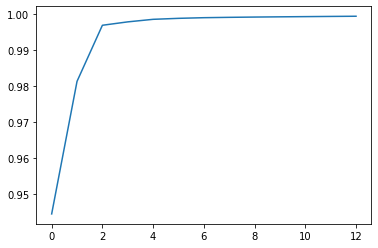

In [ ]:
plt.plot(grid_search.best_estimator_.named_steps['prep'].transformers_[2][1].explained_variance_ratio_.cumsum())

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  Index(['ADX', 'CMA', 'Corr', 'HML', 'Mkt-RF', 'OC', 'OO', 'RMW', 'RSI', 'SAR',
       'SMA', 'SMB', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4',
       'putcallratio0', 'putcallratio1', 'putcallratio10', 'putcallratio11',
       'putcallratio12', 'putcallratio13', 'putcallratio14', 'putc...
                                                  Index(['ADX', 'CMA', 'Corr', 'HML', 'Mkt-RF', 'OC', 'OO', 'RMW', 'RSI', 'SAR',
       'SMA', 'SMB', 'putcallratio0', 'putcallratio1', 'putcallratio10',
       'putcallratio11', 'putcallratio12', 'putcallratio13', 'putcallratio14',
       'putcallratio2', 'putcallratio3', 'putcallratio4', 'putcallratio5',
       'putcallratio6', 'putcallratio7', 'putcallratio8', 'putcallratio9'],
      dtype='object'))])),
                ('bridge', BayesianR

## Define Strategy in a Function

In [ ]:
def signal1(Data):
  condition1 = 0.6
  positions = list(np.zeros(len(Data)))
  for i in range(len(Data)):     
      if Data[i] - Data[i-1] > 0:     
          positions[i] = -1
      elif Data[i] - Data[i-1] < 0:   
          positions[i] = 1
  return positions

def signal2(Data, real):
  condition1 = 0.6
  positions = list(np.zeros(len(Data)))
  for i in range(len(Data)):     
      if Data[i] - real[i] > 0:     
          positions[i] = 1
      elif Data[i] - real[i] < 0:   
          positions[i] = -1
  return positions


def signal3(Data, real):
  condition1 = 1
  positions = list(np.zeros(len(Data)))
  for i in range(len(Data)): 
    if Data[i] > condition1: 
      if Data[i] < real[i]: #decreasing
          positions[i] = 1
    elif Data[i] < condition1:
      if Data[i] > real[i]: #increasing
          positions[i] = -1
    elif Data[i] > real[i]: #increasing
          positions[i] = 1
    elif Data[i] < real[i]: #increasing
          positions[i] = -1
  return positions

## Plot Returns

Text(0.5, 0, 'Date')

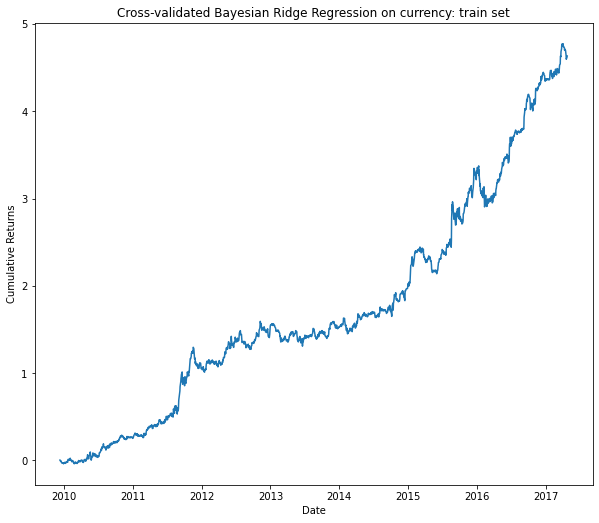

In [ ]:

positions = signal1(grid_search.predict(x_train))
positions1 = signal1(grid_search.predict(x_test))



dailyRet = pd.Series(positions).fillna(0).values * retFut1_train
dailyRet = dailyRet.fillna(0)

dailyRet1 = pd.Series(positions1).fillna(0).values * retFut1_test
dailyRet1 = dailyRet1.fillna(0)

cumret = np.cumprod(dailyRet + 1) - 1
cumret1 = np.cumprod(dailyRet1 + 1) - 1

plt.figure(1, figsize=[10,8.5])
plt.plot(cumret.index, cumret)
plt.title('Cross-validated Bayesian Ridge Regression on currency: train set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')


Text(0.5, 0, 'Date')

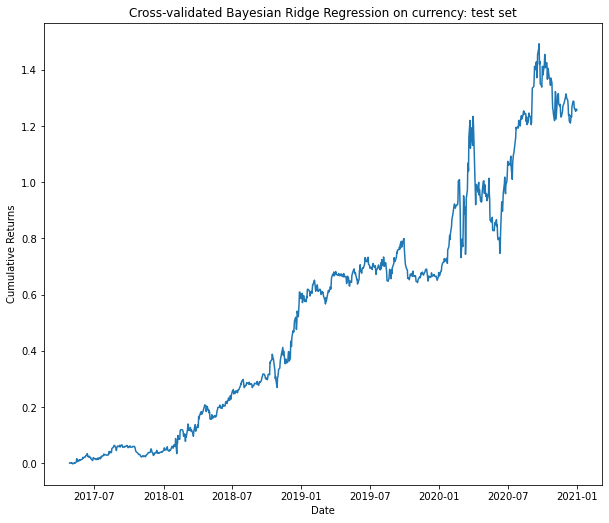

In [ ]:
plt.figure(1, figsize=[10,8.5])
plt.plot(cumret1.index, cumret1)
plt.title('Cross-validated Bayesian Ridge Regression on currency: test set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')

# Autocorrelation Check and Residual Check

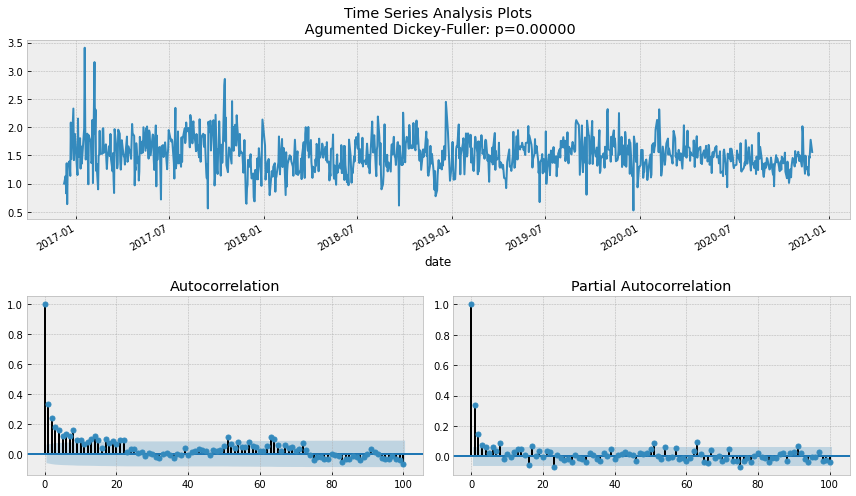

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries pandas series
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Agumented Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
tsplot(putcallratio[3000:4000], lags=100)

## Plot Residuals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ljung-Box test p-value [7.25021165e-05]


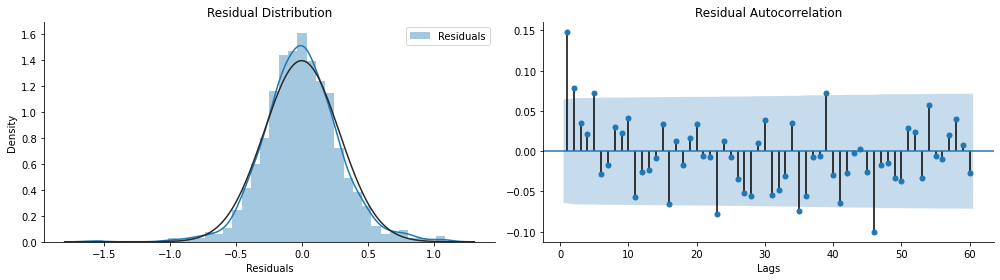

In [ ]:
#plot the residuals
true_y = y_test.values.ravel()
pred_y = grid_search.predict(x_test)
residuals = np.subtract(true_y, pred_y)
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=60, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();
#plt.show()
plt.savefig(r'Results\%s.png' %("Residuals"))

#If the p-value of the test is greater than the required significance (>0.05), residuals are independent
import statsmodels.api as sm
lb = sm.stats.acorr_ljungbox(residuals, lags=[10], boxpierce=False)
print("Ljung-Box test p-value", lb[1])


In [ ]:
"""#plot the importances
importance = pd.DataFrame(zip(best_model[1].feature_importances_, x_train.columns.values.tolist()))
importance.columns = ['importance','feature_name']
importance_plot = sns.barplot(x=importance['feature_name'], y=importance['importance'], data=importance,orient='v',dodge=False,order=importance.sort_values('importance',ascending=False).feature_name)
for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)
#plt.show()
plt.savefig(r'Results\%s.png' %("Importances"))"""

'#plot the importances\nimportance = pd.DataFrame(zip(best_model[1].feature_importances_, x_train.columns.values.tolist()))\nimportance.columns = [\'importance\',\'feature_name\']\nimportance_plot = sns.barplot(x=importance[\'feature_name\'], y=importance[\'importance\'], data=importance,orient=\'v\',dodge=False,order=importance.sort_values(\'importance\',ascending=False).feature_name)\nfor item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping\n    item.set_rotation(90)\n#plt.show()\nplt.savefig(r\'Results\\%s.png\' %("Importances"))'

# Plot Feature Importance

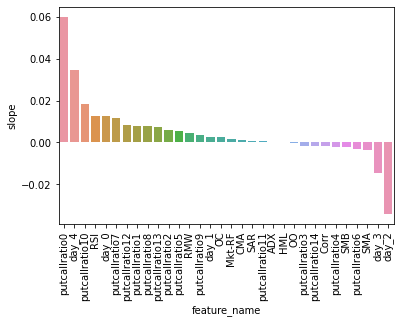

In [ ]:
#coefficients
importance = pd.DataFrame(zip(best_model[1].coef_.ravel().tolist(), x_train.columns.values.tolist()))
importance.columns = ['slope','feature_name']
importance_plot = sns.barplot(x=importance['feature_name'], y=importance['slope'], data=importance,orient='v',dodge=False,order=importance.sort_values('slope',ascending=False).feature_name)
for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)
plt.show()



## Model Metrics

In [ ]:
from sklearn.metrics import accuracy_score
true_y = y_test.values.ravel()
pred_y = grid_search.predict(x_test)
best_model.score(x_test, y_test)

0.08627612950457264

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(true_y, pred_y)

0.08146769104130429

In [ ]:
from sklearn.metrics import r2_score
true_y = y_train.values.ravel()
pred_y = grid_search.predict(x_train)

print('R^2:', r2_score(true_y, pred_y))



R^2: 0.2125653105746177


In [ ]:
cagr = (1 + cumret1[-1]) ** (252 / len(cumret1)) - 1
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet1)
print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6}').format(cagr, ratio))

Out-of-sample: CAGR=0.247479 Sharpe ratio=1.30209


# White's Reality Check

average return 0.003627
[-0.00402063  0.0042486 ]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.04359999999999997


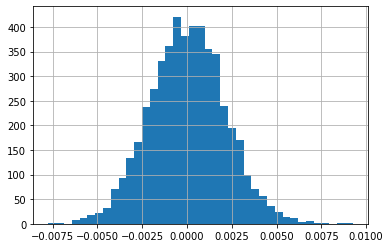

In [ ]:

detrended_open = detrendPrice.detrendPrice(openp[start+int((end-start)*2/3):])
detrended_retFut1 = detrended_open.pct_change(periods=1).shift(-1).fillna(0)
detrended_syst_rets = detrended_retFut1 * pd.Series(positions1).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
plt.show()

## Pycaret Model Evaluation

In [ ]:
import pycaret

from pycaret.utils import enable_colab
enable_colab()

from pycaret.regression import *


Colab mode enabled.


In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [ ]:
from pycaret.regression import *
def pycarett(dataset):

  data = dataset.sample(frac=0.9, random_state=786)
  data_unseen = dataset.drop(data.index)

  data.reset_index(drop=True, inplace=True)
  data_unseen.reset_index(drop=True, inplace=True)

  print('Data for Modeling: ' + str(data.shape))
  print('Unseen Data For Predictions: ' + str(data_unseen.shape))

  exp_reg101 = setup(data = data, target = 'putcallratio0', session_id=123, pca=True, normalize=True)

pycarett(df)



,Description,Value
0,session_id,123
1,Target,putcallratio0
2,Original Data,"(4756, 33)"
3,Missing Values,True
4,Numeric Features,32
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2543, 29)"


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.3129,0.2167,0.4636,0.2351,0.1678,0.2720,0.018
huber,Huber Regressor,0.3113,0.2168,0.4637,0.2346,0.1671,0.2659,0.034
lr,Linear Regression,0.3139,0.2172,0.4640,0.2334,0.1680,0.2716,0.517
ridge,Ridge Regression,0.3139,0.2172,0.4640,0.2334,0.1680,0.2716,0.025
lar,Least Angle Regression,0.3139,0.2172,0.4640,0.2334,0.1680,0.2716,0.033
omp,Orthogonal Matching Pursuit,0.3225,0.2271,0.4745,0.1983,0.1717,0.2821,0.037
gbr,Gradient Boosting Regressor,0.3252,0.2304,0.4777,0.1881,0.1717,0.2752,1.592
et,Extra Trees Regressor,0.3252,0.2304,0.4779,0.1872,0.1724,0.2823,1.945
rf,Random Forest Regressor,0.3258,0.2319,0.4794,0.1825,0.1733,0.2808,5.454
catboost,CatBoost Regressor,0.3278,0.2332,0.4805,0.1787,0.1731,0.2829,9.701


In [ ]:
df

,Mkt-RF,SMB,HML,RMW,CMA,RSI,SMA,Corr,SAR,ADX,OO,OC,day_0,day_1,day_2,day_3,day_4,pcratio1,putcallratio0,putcallratio1,putcallratio2,putcallratio3,putcallratio4,putcallratio5,putcallratio6,putcallratio7,putcallratio8,putcallratio9,putcallratio10,putcallratio11,putcallratio12,putcallratio13,putcallratio14
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,-4.71875,-1.90625,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,148.250000,0.000000,-3.59375,0.18750,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,146.528126,0.000000,-0.31250,-0.37500,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,144.672501,0.000000,0.68750,2.56250,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.21,-0.43,-0.18,0.23,-0.06,57.157480,368.392858,-0.037166,362.030000,23.264808,-0.20001,0.50998,0,0,0,1,0,1.380474,1.388211,1.439511,1.657790,1.332431,1.290459,0.602732,1.354761,1.569899,1.160836,1.400932,1.353851,1.337574,1.479274,1.198804,1.402776
2020-12-28,0.46,-0.67,0.34,1.39,0.46,59.393363,368.332143,0.101023,365.315998,23.965289,3.66000,2.73999,1,0,0,0,0,1.877185,1.380474,1.388211,1.439511,1.657790,1.332431,1.290459,0.602732,1.354761,1.569899,1.160836,1.400932,1.353851,1.337574,1.479274,1.198804
2020-12-29,-0.40,-1.42,0.23,0.75,-0.30,63.892082,368.552144,0.296081,367.217190,25.166677,2.07001,1.63999,0,1,0,0,0,1.388179,1.877185,1.380474,1.388211,1.439511,1.657790,1.332431,1.290459,0.602732,1.354761,1.569899,1.160836,1.400932,1.353851,1.337574,1.479274
